In [189]:
import numpy as np
import pandas as pd
from glob import glob
import os
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import json

In [18]:
image_folder = '/kaggle/input/agricultural-crops-image-classification/Agricultural-crops'
labels = os.listdir(image_folder)

In [9]:
label_encode = {j:i for i,j in enumerate(labels)}
label_encode_inverse = {j:i for i,j in label_encode.items()}

In [23]:
glob(f'{image_folder}/{labels[0]}/*')[0]

'/kaggle/input/agricultural-crops-image-classification/Agricultural-crops/tomato/image (16).jpeg'

In [68]:
def imshow(loc):
    image = cv2.imread(loc)
    print(image.shape)
    # image = cv2.resize(image, (128, 128))
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # print(type(image))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

(1198, 1800, 3)


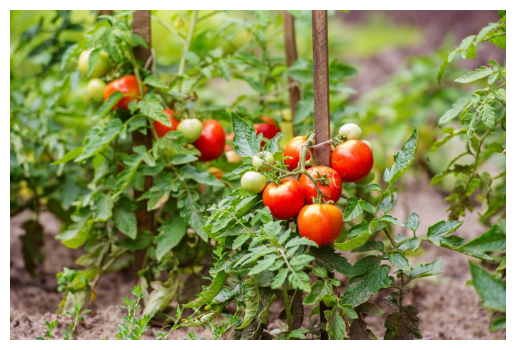

In [69]:
imshow(glob(f'{image_folder}/{labels[0]}/*')[6])

In [87]:
def image_to_numpy(loc):
    image = cv2.imread(loc)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (128, 128))
    image = image.reshape(1, 128, 128, 1)
    return image

In [143]:
x = []
y = []

for i in tqdm(range(len(labels))):
    for image_loc in glob(f'{image_folder}/{label_encode_inverse[i]}/*'):
        image_numpy = image_to_numpy(image_loc)
        x.append(image_numpy)
        temp = [0] * len(labels)
        temp[i] = 1
        y.append(temp)
x = np.concatenate(x)/255
y = np.array(y)
print(x.shape, y.shape)

100%|██████████| 30/30 [00:07<00:00,  3.86it/s]

(829, 128, 128, 1) (829, 30)


In [130]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [145]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(len(labels), activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [146]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
21/21 [==============================] - 13s 576ms/step - loss: 30.5038 - accuracy: 0.0211
Epoch 2/5
21/21 [==============================] - 12s 555ms/step - loss: 3.1288 - accuracy: 0.1795
Epoch 3/5
21/21 [==============================] - 12s 573ms/step - loss: 2.3965 - accuracy: 0.3695
Epoch 4/5
21/21 [==============================] - 12s 551ms/step - loss: 1.3604 - accuracy: 0.6576
Epoch 5/5
21/21 [==============================] - 12s 553ms/step - loss: 0.5844 - accuracy: 0.8462


In [147]:
model.evaluate(x_test, y_test)

6/6 [==============================] - 1s 118ms/step - loss: 5.3747 - accuracy: 0.1807


[5.3747100830078125, 0.1807228922843933]

In [167]:
def prediction(loc):
    image = image_to_numpy(loc)
    index = np.argmax(model.predict(image))
    return label_encode_inverse[index]

wheat
(1125, 2000, 3)


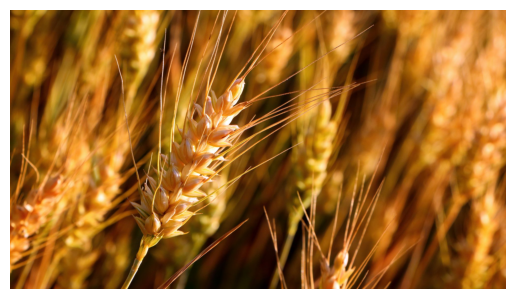

1/1 [==============================] - 0s 31ms/step


'wheat'

In [173]:
n = 14
print(labels[n])
loc = glob(f'{image_folder}/{labels[n]}/*')[6]
imshow(loc)
prediction(loc)

In [192]:
model.save('model/model.h5')

In [188]:
label_encode_inverse

{0: 'tomato',
 1: 'chilli',
 2: 'clove',
 3: 'pineapple',
 4: 'vigna-radiati(Mung)',
 5: 'Olive-tree',
 6: 'coconut',
 7: 'papaya',
 8: 'Tobacco-plant',
 9: 'jute',
 10: 'jowar',
 11: 'gram',
 12: 'tea',
 13: 'maize',
 14: 'wheat',
 15: 'soyabean',
 16: 'Pearl_millet(bajra)',
 17: 'Lemon',
 18: 'Fox_nut(Makhana)',
 19: 'mustard-oil',
 20: 'sugarcane',
 21: 'almond',
 22: 'Cucumber',
 23: 'sunflower',
 24: 'cotton',
 25: 'banana',
 26: 'Cherry',
 27: 'cardamom',
 28: 'rice',
 29: 'Coffee-plant'}

In [206]:
with open('model/encoder.json', 'w') as f:
    json.dump(label_encode_inverse, f, indent=4)

In [197]:
!zip model.zip model/*

  adding: model/encoder.json (deflated 53%)
  adding: model/model.h5 (deflated 20%)


# Model.py

In [213]:
!rm -fr model

In [214]:
!unzip model.zip

Archive:  model.zip
   creating: model/
  inflating: model/encoder.json      
  inflating: model/model.h5          


In [215]:
import tensorflow as tf
import cv2
import numpy as np
import json

model = tf.keras.models.load_model('model/model.h5')

with open('model/encoder.json', 'r') as f:
    label_encode_inverse = json.load(f)

def image_to_numpy(loc):
    image = cv2.imread(loc)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (128, 128))
    image = image.reshape(1, 128, 128, 1)
    return image

def prediction(loc):
    image = image_to_numpy(loc)
    index = np.argmax(model.predict(image))
    return label_encode_inverse[str(index)]

wheat
(1125, 2000, 3)


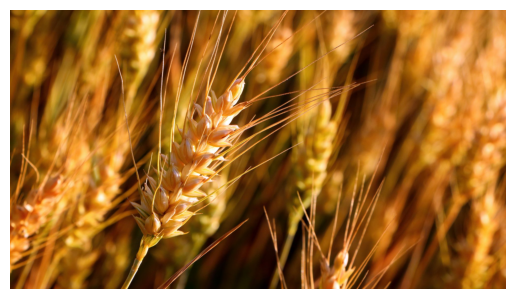

1/1 [==============================] - 0s 99ms/step


'wheat'

In [216]:
n = 14
print(labels[n])
loc = glob(f'{image_folder}/{labels[n]}/*')[6]
imshow(loc)
prediction(loc)